In [47]:
import numpy as np
import pandas as pd

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder

# for resampling 
from imblearn.over_sampling import RandomOverSampler

#for MODEL
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#for checking testing results
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

# ANN Struktur
import keras
from keras.utils import np_utils
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow.keras.layers import Dense, Activation, Dropout

###**Input Data**

In [48]:
datacovid = "/content/COVID-19 Cases.csv"
data = pd.read_csv(datacovid)
data

,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,Combined_Key,FIPS,Lat,Long,Table_Names,Prep_Flow_Runtime
0,Confirmed,319,1,4/11/2020,Mauritius,NaN,NaN,NaN,NaN,-20.200000,57.500000,Time Series,4/13/2020 9:18:41 PM
1,Deaths,0,0,2/27/2020,Bahamas,NaN,NaN,NaN,NaN,25.034300,-77.396300,Time Series,4/13/2020 9:18:41 PM
2,Confirmed,16,0,2/16/2020,Germany,NaN,NaN,NaN,NaN,51.000000,9.000000,Time Series,4/13/2020 9:18:41 PM
3,Deaths,0,0,1/31/2020,Canada,Alberta,NaN,NaN,NaN,53.933300,-116.576500,Time Series,4/13/2020 9:18:41 PM
4,Deaths,0,0,3/4/2020,Australia,Queensland,NaN,NaN,NaN,-28.016700,153.400000,Time Series,4/13/2020 9:18:41 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
539171,Deaths,0,0,1/29/2020,US,Kansas,Bourbon,"Bourbon, Kansas, US",20011.0,37.855086,-94.848660,Time Series,4/13/2020 9:18:41 PM
539172,Confirmed,0,0,2/11/2020,US,Michigan,Luce,"Luce, Michigan, US",26095.0,46.472274,-85.544712,Time Series,4/13/2020 9:18:41 PM
539173,Deaths,0,0,3/28/2020,US,Missouri,Benton,"Benton, Missouri, US",29015.0,38.295033,-93.287561,Time Series,4/13/2020 9:18:41 PM
539174,Confirmed,0,0,2/8/2020,US,Iowa,Hancock,"Hancock, Iowa, US",19081.0,43.081785,-93.734549,Time Series,4/13/2020 9:18:41 PM


## Preprocessing data


In [49]:
# Memeriksa missing/null value
data.isnull().sum()

Case_Type                0
Cases                    0
Difference               0
Date                     0
Country_Region           0
Province_State       29538
Admin2               43274
Combined_Key         42505
FIPS                 58341
Lat                    165
Long                   165
Table_Names              1
Prep_Flow_Runtime        1
dtype: int64

In [50]:
# Memeriksa info dalam dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539176 entries, 0 to 539175
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Case_Type          539176 non-null  object 
 1   Cases              539176 non-null  int64  
 2   Difference         539176 non-null  int64  
 3   Date               539176 non-null  object 
 4   Country_Region     539176 non-null  object 
 5   Province_State     509638 non-null  object 
 6   Admin2             495902 non-null  object 
 7   Combined_Key       496671 non-null  object 
 8   FIPS               480835 non-null  float64
 9   Lat                539011 non-null  float64
 10  Long               539011 non-null  float64
 11  Table_Names        539175 non-null  object 
 12  Prep_Flow_Runtime  539175 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 53.5+ MB


In [51]:
# Memeriksa Korelasi antar variabel dalam dataset
data.corr()

,Cases,Difference,FIPS,Lat,Long
Cases,1.000000,0.740441,0.000289,0.007498,0.074234
Difference,0.740441,1.000000,-0.000541,0.011480,0.061022
FIPS,0.000289,-0.000541,1.000000,0.075647,0.087390
Lat,0.007498,0.011480,0.075647,1.000000,-0.549014
Long,0.074234,0.061022,0.087390,-0.549014,1.000000


In [52]:
# Untuk melihat gambaran umum mengenai data dengan statistik deskriptif menggunakan fungsi describe.
data.describe()

,Cases,Difference,FIPS,Lat,Long
count,539176.000000,539176.000000,480835.000000,539011.000000,539011.000000
mean,56.345032,3.711306,30343.742552,35.977501,-80.377352
std,1693.212329,101.801830,15198.028420,11.564466,41.558611
min,0.000000,-1314.000000,60.000000,-51.796300,-170.132000
25%,0.000000,0.000000,18171.000000,33.605200,-97.445723
50%,0.000000,0.000000,29173.000000,37.937575,-88.639223
75%,0.000000,0.000000,45079.000000,41.683301,-81.090685
max,170099.000000,25615.000000,56045.000000,71.706900,178.065000


In [53]:
data.columns

Index(['Case_Type', 'Cases', 'Difference', 'Date', 'Country_Region',
       'Province_State', 'Admin2', 'Combined_Key', 'FIPS', 'Lat', 'Long',
       'Table_Names', 'Prep_Flow_Runtime'],
      dtype='object')

In [54]:
# Drop kolom-kolom yang tidak digunakan (Feature Selection)
to_drop = ['Date','Province_State','Admin2','Combined_Key','FIPS','Table_Names', 'Prep_Flow_Runtime','Lat','Long']
data.drop(to_drop, inplace=True, axis=1)

In [55]:
data.isnull().sum()

Case_Type         0
Cases             0
Difference        0
Country_Region    0
dtype: int64

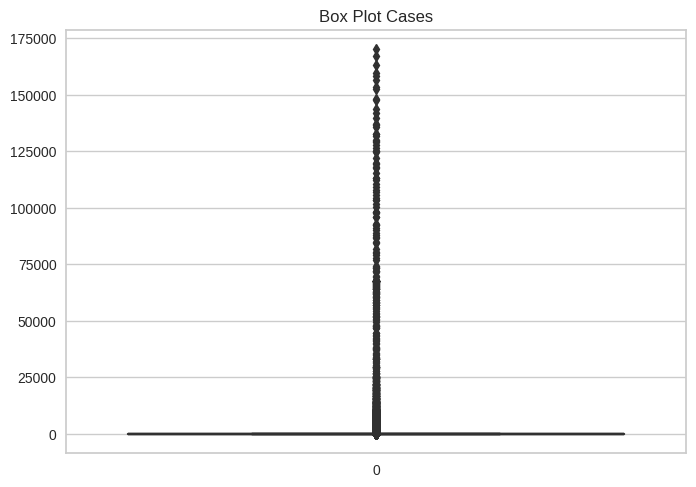

In [56]:
# Membuat box plot dari kolom BMI
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data['Cases'])
plt.title('Box Plot Cases')
plt.show()

In [57]:
# Rows containing duplicate data
data.duplicated().any()

True

In [58]:
# Mengatasi data duplikat dengan removing

# Print the number of rows before removing duplicates
print("Number of rows before removing duplicates:", len(data))

# Drop duplicates
data.drop_duplicates(inplace=True)

# Print the number of rows after removing duplicates
print("Number of rows after removing duplicates:", len(data))

# Simpan dataframe ke dalam file CSV
data.to_csv('COVID 19 Cases.csv', index=False)

Number of rows before removing duplicates: 539176
Number of rows after removing duplicates: 18910


In [59]:
# Tampilan data yang telah bebas missing/null values dan duplikat
data

,Case_Type,Cases,Difference,Country_Region
0,Confirmed,319,1,Mauritius
1,Deaths,0,0,Bahamas
2,Confirmed,16,0,Germany
3,Deaths,0,0,Canada
4,Deaths,0,0,Australia
...,...,...,...,...
538943,Confirmed,76,16,US
538990,Confirmed,483,-18,US
539063,Confirmed,198,11,US
539079,Confirmed,2716,584,US


In [60]:
# Periksa kembali data duplikat
data.duplicated().any()

False

In [61]:
# Encode Kolom Target
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
encoder = LabelEncoder()
data['Case_Type'] = encoder.fit_transform(data['Case_Type'])
data['Country_Region']=encoder.fit_transform(data['Country_Region'])
data

,Case_Type,Cases,Difference,Country_Region
0,0,319,1,109
1,1,0,0,11
2,0,16,0,65
3,1,0,0,32
4,1,0,0,8
...,...,...,...,...
538943,0,76,16,170
538990,0,483,-18,170
539063,0,198,11,170
539079,0,2716,584,170


In [62]:
# Jumlah kemunculan setiap nilai yang ada di dalam kolom 'Case_Type'.
data['Case_Type'].value_counts()

0    15018
1     3892
Name: Case_Type, dtype: int64

In [63]:
data['Case_Type']=data['Case_Type'].astype('category')
data['Country_Region']=data['Country_Region'].astype('category')

In [64]:
# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
col=['Cases','Difference']
scaled_ds=scaler.fit_transform(data[col])

Elbow Method to determine the number of clusters to be formed:


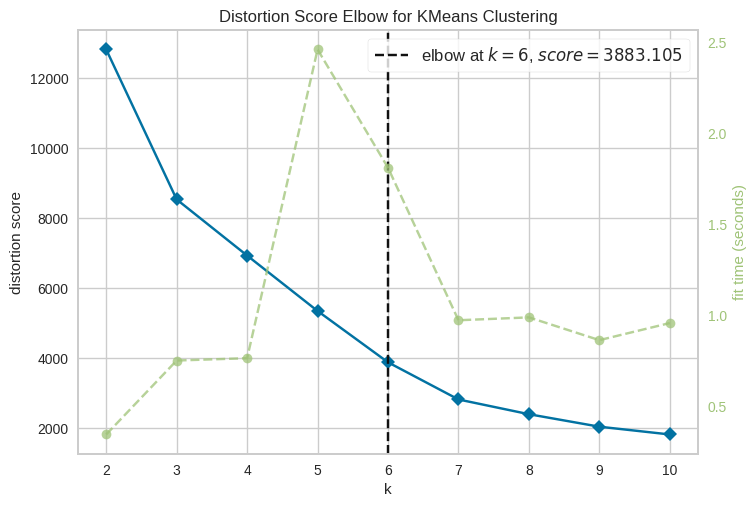

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
# Analisis clustering dengan data yang telah dinormalisasi

# Mengabaikan pesan peringatan yang muncul selama program dijalankan
import warnings
warnings.filterwarnings('ignore')
# Import beberapa algoritma clustering
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from yellowbrick.cluster import KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
# Analisis Elbow Method pada data yang telah dinormalisasi
Elbow_M = KElbowVisualizer(KMeans(), k=10) # KElbowVisualizer adalah alat visualisasi yang membantu dalam memilih jumlah klaster yang optimal untuk set data, # Algoritma clustering yang digunakan untuk analisis Elbow Method
# melakukan pemanggilan metode 'fit' pada objek Elbow_M dengan memberikan parameter data yang telah dinormalisasi.
Elbow_M.fit(scaled_ds)
# Menampilkan hasil analisis Elbow Method dalam bentuk visualisasi
Elbow_M.show()

In [66]:
# Implementasi dari algoritma KMeans clustering pada data yang telah dinormalisasi dengan menggunakan StandardScaler.
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(scaled_ds)

In [67]:
data['Cluster']=label

In [68]:
data.Cluster.value_counts()

2    18293
0      425
1       81
3       56
4       55
Name: Cluster, dtype: int64

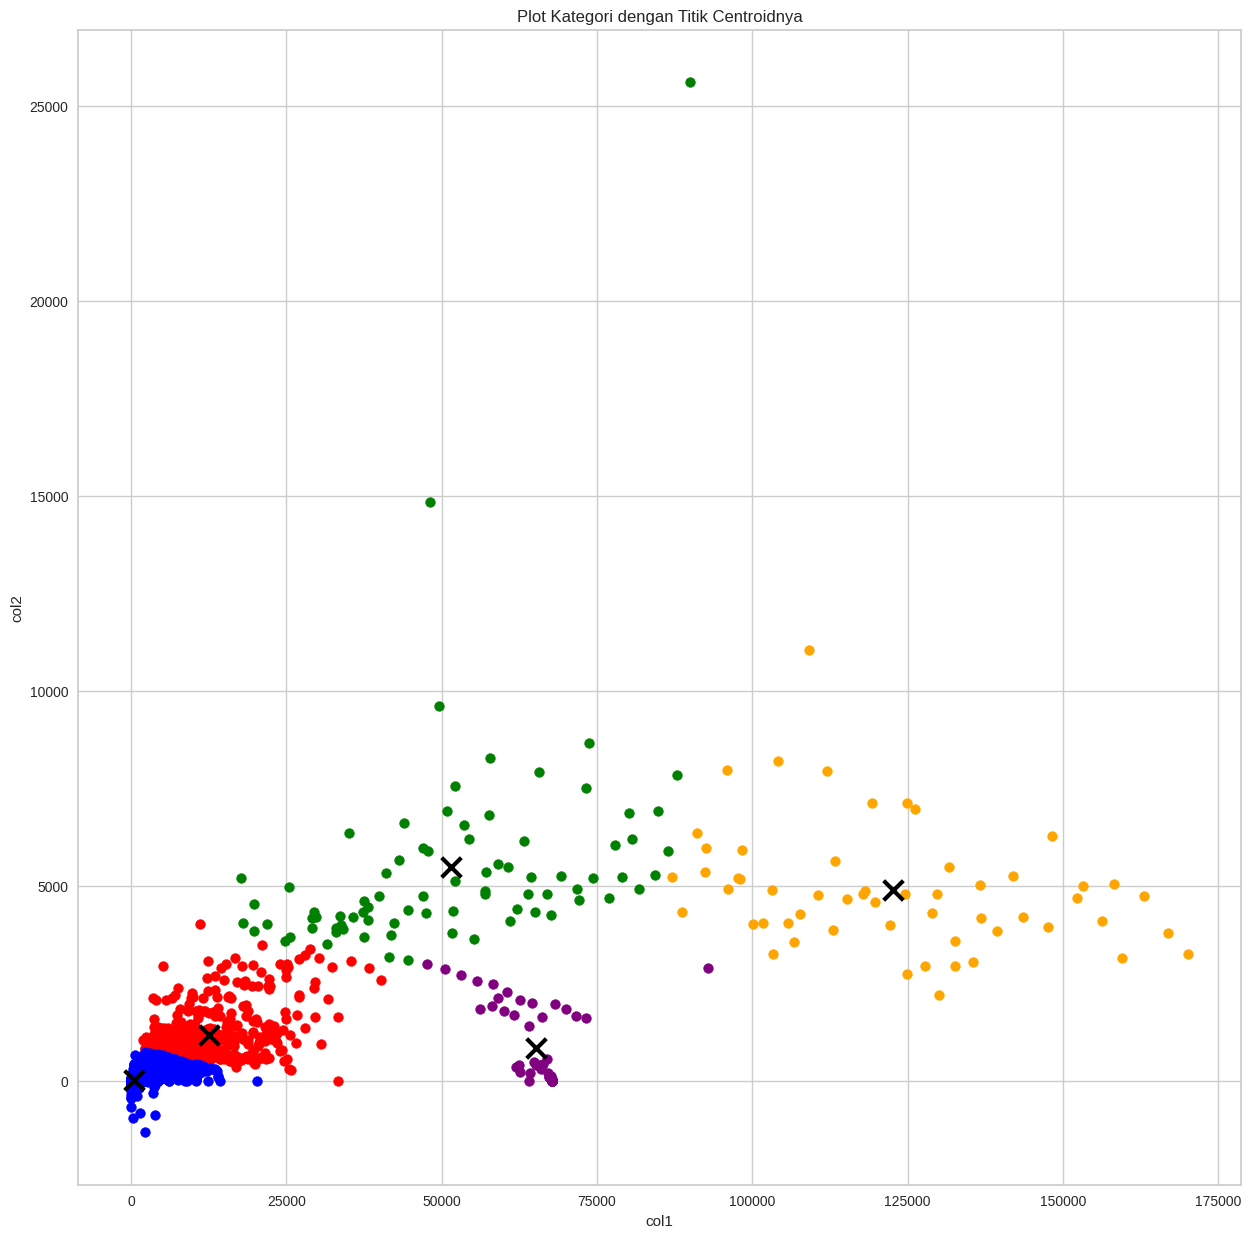

In [69]:
# Visualisasi hasil clustering menggunakan scatter plot
import matplotlib.pyplot as plt
# Menghitung titik centroid untuk setiap kategori
centroids = data.groupby('Cluster')[['Cases', 'Difference']].mean()

# Membuat plot untuk masing-masing kategori dan centroid
fig, ax = plt.subplots(figsize=(15, 15))
colors = ['red', 'green', 'blue', 'orange', 'purple']
for label, color in enumerate(colors[:len(centroids)]):
    indices = data['Cluster'] == label
    ax.scatter(data.loc[indices, 'Cases'], data.loc[indices, 'Difference'], c=color, s=50)
    centroid = centroids.loc[label]
    ax.scatter(centroid[0], centroid[1], marker='x', s=200, linewidths=3, color='black')

# Menambahkan judul dan label sumbu
ax.set_title('Plot Kategori dengan Titik Centroidnya')
ax.set_xlabel('col1')
ax.set_ylabel('col2')

# Menampilkan plot
plt.show()

In [70]:
data.columns

Index(['Case_Type', 'Cases', 'Difference', 'Country_Region', 'Cluster'], dtype='object')

In [71]:
from sklearn.model_selection import train_test_split
X = data[['Case_Type', 'Cases', 'Difference', 'Country_Region']]
y = data['Cluster']
# for resampling 
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='auto')

X_ros, y_ros = oversample.fit_resample(X, y)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_ros,y_ros, test_size=0.2, random_state=42)

In [73]:
from sklearn.preprocessing import StandardScaler
# Memilih kolom numerik
columns = ['Cases','Difference']

# Membuat objek scaler
sc = StandardScaler()

# Melakukan z-score pada dataset
sc_Xtrain= sc.fit_transform(X_train[columns])
sc_Xtest=sc.fit_transform(X_test[columns])

In [74]:
X_train[columns]=sc_Xtrain
X_test[columns]=sc_Xtest

In [75]:
X_train

,Case_Type,Cases,Difference,Country_Region
41248,0,0.628379,0.995627,174
83489,0,0.430818,-0.240539,80
53650,0,0.086420,1.347622,36
63566,0,2.376094,0.929378,155
16293,0,-1.107609,-0.874638,170
...,...,...,...,...
6265,0,-1.110144,-0.908854,36
54886,0,0.412014,1.001452,84
76820,0,0.349430,-0.755244,36
860,0,-1.112900,-0.909218,16


# KNN Classification

In [76]:
# Implementasi dari algoritma K-Nearest Neighbors (KNN) pada data yang telah di-split menjadi data training (X_train, y_train) dan data testing.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [77]:
knn_pred = knn.predict(X_test)
knn_pred

array([3, 3, 4, ..., 3, 1, 4], dtype=int32)

In [78]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
akurasi=accuracy_score(y_test, knn_pred)
akurasi

0.9997813371234898

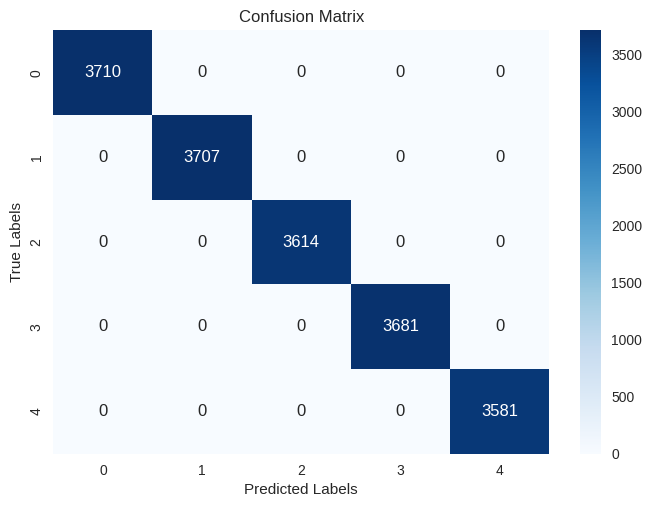

In [79]:
# Data klasifikasi yang dihasilkan oleh model
true_labels = np.array(knn_pred)
predicted_labels = np.array(knn_pred)

# Menghitung confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Membuat heatmap dari confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [80]:
model = Sequential()
model.add(Dense(32,activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [81]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

model.summary()
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                160       
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 5)                 165       
                                                                 
Total params: 3,493
Trainable params: 3,493
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
572/572 [==============================]

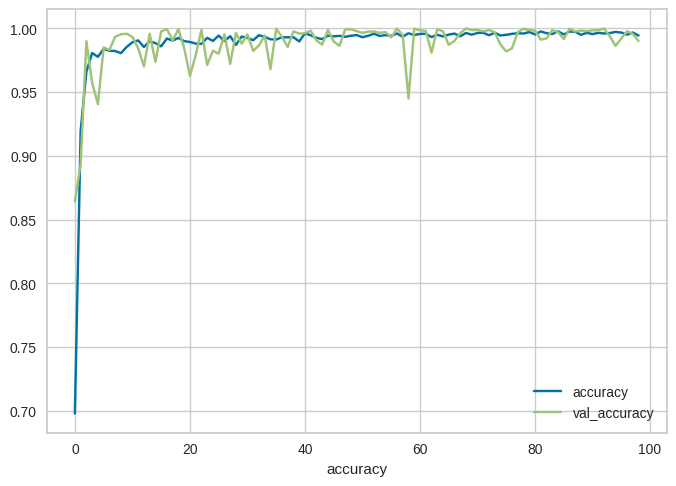

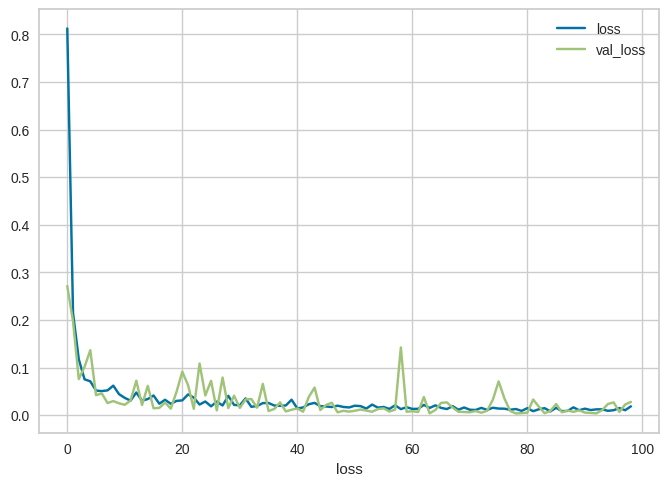

In [82]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('epoch')
    plt.xlabel(string)
    plt.legend([string, "val_"+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [83]:
evaluation = model.evaluate(X_test, y_test)

572/572 [==============================] - 1s 2ms/step - loss: 0.0035 - accuracy: 0.9997


In [84]:
y_pred = np.argmax(model.predict(X_test), axis=1)

572/572 [==============================] - 1s 1ms/step


In [85]:
y_pred

array([3, 3, 4, ..., 3, 1, 4])

In [86]:
y_test

61738    3
57512    3
87193    4
79501    4
34021    0
        ..
76224    4
30502    0
55539    3
45723    1
78698    4
Name: Cluster, Length: 18293, dtype: int32

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3706
           1       1.00      1.00      1.00      3707
           2       1.00      1.00      1.00      3618
           3       1.00      1.00      1.00      3681
           4       1.00      1.00      1.00      3581

    accuracy                           1.00     18293
   macro avg       1.00      1.00      1.00     18293
weighted avg       1.00      1.00      1.00     18293



In [88]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3706,    0,    0,    0,    0],
       [   0, 3707,    0,    0,    0],
       [   6,    0, 3612,    0,    0],
       [   0,    0,    0, 3681,    0],
       [   0,    0,    0,    0, 3581]])

Text(0.5, 1.0, 'Confusion Matrix Model with ANN')

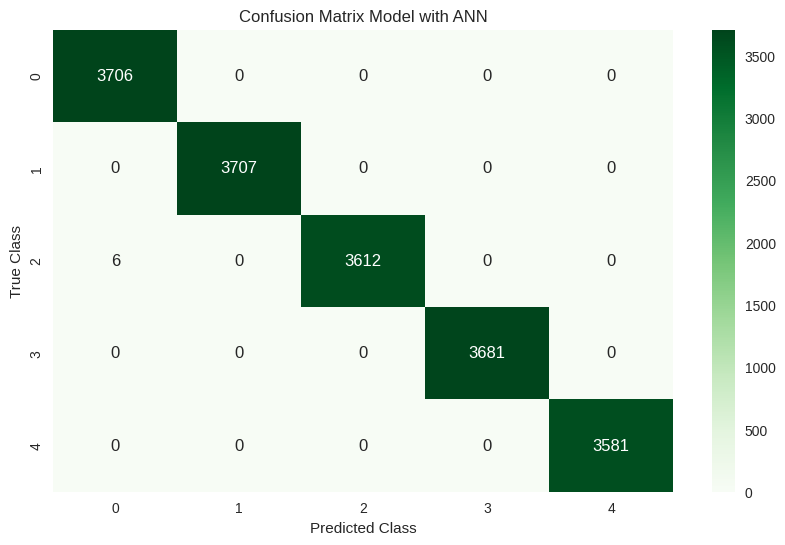

In [89]:
fig = plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, fmt = "d", cmap= 'Greens')

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model with ANN")

In [90]:
import pickle

In [93]:
filename = 'covidcases_model.sav'
pickle.dump(knn, open(filename, 'wb'))